/data/app/anaconda3/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


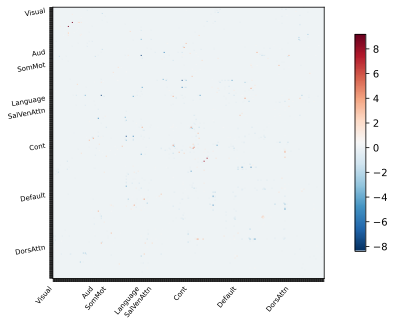

In [1]:
from nilearn import plotting
import pandas as pd
import os.path as op
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

scrPath = Path(os.getcwd())
rootPath = scrPath.parent
dist_obs = pd.read_csv(op.join(rootPath, 'stats', 'dist_obs_SNreg.csv'))
net_info = pd.read_csv(op.join(rootPath, 'net_info.csv'))
labels = net_info.loc[:,'network'].tolist()
for i, j in enumerate(labels):
    if j == 'Aud' or j == 'Language':
        labels[i] = j
    else:
        labels[i] = j[:-1]
net, pos, unit = np.unique(labels, return_index=True, return_inverse=True)
for i, j in enumerate(labels):
    if i not in pos:
        labels[i] = None

plotting.plot_matrix(dist_obs, labels=labels)

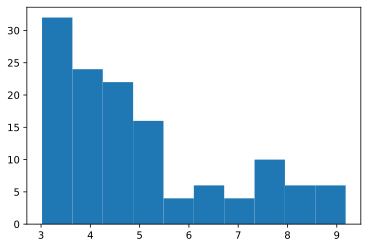

In [2]:
x = np.array(dist_obs)
x = abs(x.reshape(160000,1))
plt.hist(x[x>3], bins=10)
plt.show()

In [33]:
for netName in net:
    coords = net_info.loc[:, ['Ri', 'Ant', 'Sup']]
    coords = coords.values.tolist()
    threshold = 2
    adj_mat = np.copy(dist_obs)
    focus = unit == net.tolist().index(netName)
    adj_mat[np.ix_(~focus, ~focus)] = 0
    adj_mat[abs(adj_mat)<threshold] = 0 
    edge_Sig = np.any(adj_mat[:, focus] != 0, axis=1)
    network_Sig = np.unique(net_info.loc[edge_Sig|focus,'network'])
    color = net_info.loc[:, ['R', 'G', 'B', 'A']]
    color.loc[~(edge_Sig|focus), 'A'] = 0
    color = color.values.tolist()
    plotting.plot_connectome(adj_mat, \
                                node_coords=coords, \
                                node_color=color, \
                                node_size=5, \
                                edge_cmap='coolwarm', \
                                edge_vmin=-10, \
                                edge_vmax=10, \
                                edge_threshold=threshold, \
                                colorbar=True, \
                                title=('connectome related to %s') % netName, \
                                output_file=('connectome_%s.svg') % netName)

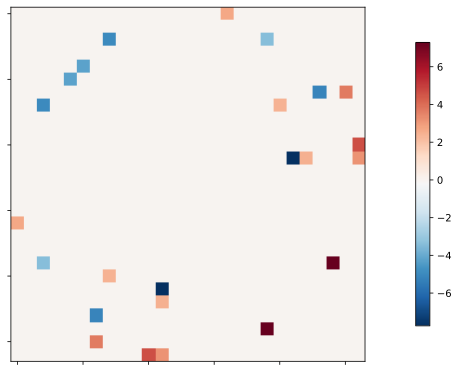

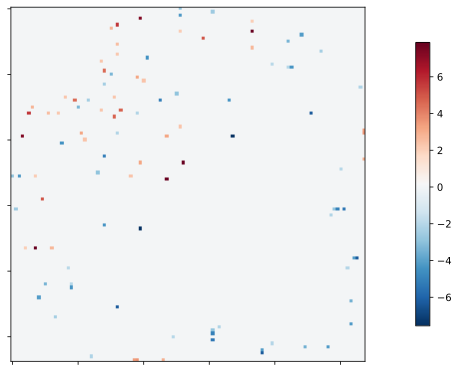

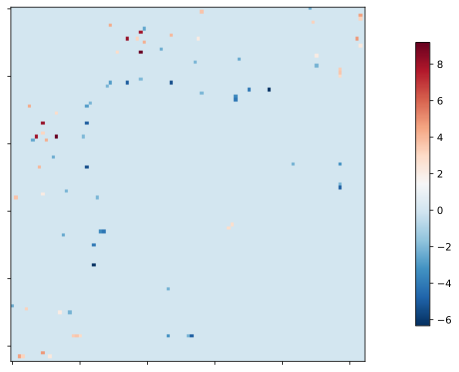

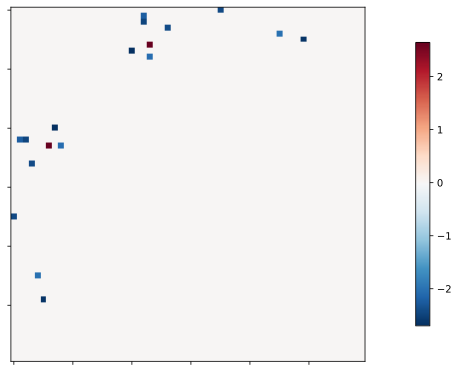

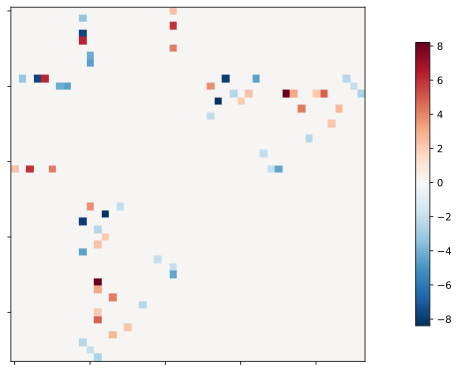

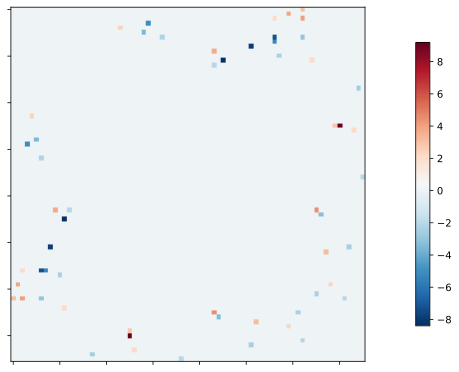

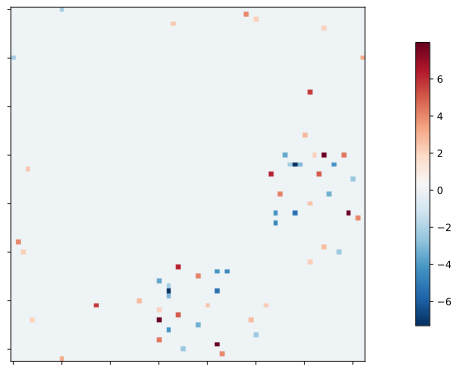

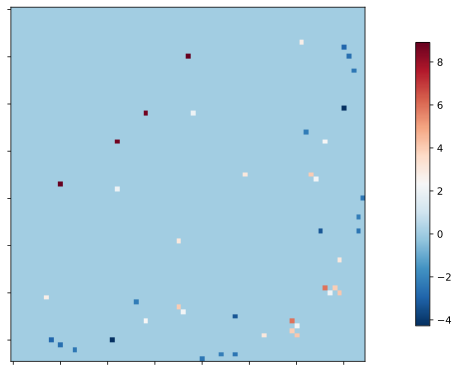

In [3]:
for netName in net:
    threshold = 2
    adj_mat = np.copy(dist_obs)
    focus = unit == net.tolist().index(netName)
    adj_mat[np.ix_(~focus, ~focus)] = 0
    adj_mat[abs(adj_mat)<threshold] = 0 
    edge_Sig = np.any(adj_mat[:, focus] != 0, axis=1)
    network_Sig = np.unique(net_info.loc[edge_Sig|focus,'network'])
    adj_mat = adj_mat[np.ix_(edge_Sig|focus, edge_Sig|focus)]
    color = net_info.loc[edge_Sig|focus, ['R', 'G', 'B', 'A']]
    color = color.values.tolist()
    coords = net_info.loc[edge_Sig|focus, ['Ri', 'Ant', 'Sup']]
    coords = coords.values.tolist()
    view = plotting.view_connectome(adj_mat, \
                                    node_coords=coords, \
                                    node_color=color, \
                                    node_size=5, \
                                    colorbar_height=1, \
                                    edge_threshold=0, \
                                    edge_cmap='coolwarm', \
                                    title='connectome of %s' % netName)
    view.save_as_html('connectome_%s.html' % netName)
    plotting.plot_matrix(adj_mat)